In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import nltk
from nltk.corpus import stopwords
from collections import  Counter
import re
import string

In [2]:
# Load movies data on DF
df = pd.read_parquet('data/movies_clean.pq')

In [3]:
df.shape

(45429, 19)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45429 entries, 0 to 45428
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4495 non-null   object 
 1   budget                 45429 non-null  float64
 2   genres                 45429 non-null  object 
 3   id                     45429 non-null  int64  
 4   original_language      45418 non-null  object 
 5   overview               45429 non-null  object 
 6   popularity             45429 non-null  object 
 7   production_companies   45429 non-null  object 
 8   production_countries   45429 non-null  object 
 9   release_date           45429 non-null  object 
 10  revenue                45429 non-null  float64
 11  runtime                45183 non-null  float64
 12  status                 45349 non-null  object 
 13  title                  45429 non-null  object 
 14  vote_average           45429 non-null  float64
 15  vo

In [4]:
df.describe()

,budget,id,revenue,runtime,vote_average,vote_count,release_year,return
count,4.542900e+04,45429.000000,4.542900e+04,45183.000000,45429.000000,45429.000000,45429.000000,4.542900e+04
mean,4.232302e+06,107994.348742,1.122324e+07,94.178784,5.624130,109.993176,1991.879240,6.592733e+02
std,1.743291e+07,112120.983871,6.435476e+07,38.328436,1.915169,491.433718,24.058656,7.464971e+04
min,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26368.000000,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59873.000000,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156335.000000,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


<AxesSubplot:>

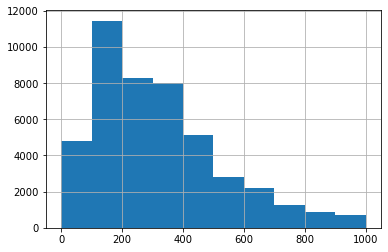

In [8]:
df['overview'].str.len().hist()

In [56]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new=text.str.lower()   
    new = new.apply(lambda w: re.sub('[%s]' % re.escape(string.punctuation), '', w) )
    new= new.str.split()
   
    new = new.values.tolist()

    new = [palabra for palabra in new if len(palabra)>2]



    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    print (most)
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df['overview'])
#plot_top_non_stopwords_barchart(df['title'])


[('the', 138269), ('a', 98993), ('and', 75376), ('to', 73424), ('of', 69655), ('in', 48200), ('is', 36532), ('his', 36232), ('with', 23946), ('her', 21525), ('he', 20487), ('for', 18388), ('on', 17448), ('an', 16798), ('by', 15797), ('that', 15371), ('as', 14752), ('who', 14404), ('their', 13156), ('from', 12534), ('but', 11058), ('when', 10803), ('they', 10129), ('she', 9697), ('has', 9488), ('are', 9029), ('at', 8777), ('him', 8357), ('life', 7400), ('this', 7365), ('it', 7236), ('one', 7220), ('into', 6686), ('young', 6396), ('after', 6382), ('up', 5962), ('out', 5956), ('film', 5752), ('be', 5683), ('new', 5561), ('about', 5147), ('two', 5140), ('love', 5123), ('man', 5073), ('all', 4634), ('story', 4544), ('have', 4473), ('family', 4465), ('them', 4456), ('world', 4311), ('will', 4154), ('was', 4135), ('not', 3685), ('find', 3576), ('only', 3517), ('which', 3454), ('years', 3435), ('woman', 3362), ('time', 3272), ('while', 3196), ('its', 3173), ('where', 3151), ('get', 3032), ('fa

/home/ozzy/.local/lib/python3.10/site-packages/seaborn/categorical.py:638: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(vals, index=index)


ValueError: min() arg is an empty sequence

[('collection', 2720), ('the', 1131), ('of', 230), ('series', 144), ('and', 84), ('man', 62), ('a', 62), ('in', 56), ('on', 51), ('boys', 47), ('trilogy', 45), ('movie', 40), ('original', 40), ('chan', 40), ('charlie', 39), ('dead', 37), ('star', 33), ('i', 33), ('universal', 32), ('night', 31), ('swordsman', 31), ('godzilla', 29), ('dragon', 29), ('blind', 29), ('bowery', 29), ('american', 28), ('to', 27), ('story', 26), ('james', 26), ('bond', 26), ('hammer', 26), ('zatôichi', 26), ('wolf', 25), ('carry', 25), ('black', 24), ('ball', 24), ('street', 23), ('time', 23), ('death', 23), ('from', 22), ('little', 22), ('love', 22), ('high', 22), ('animation', 21), ('sidney', 21), ('toler', 21), ('z', 21), ('house', 19), ('my', 19), ('de', 19), ('king', 18), ('land', 18), ('george', 18), ('animated', 18), ('la', 18), ('collezione', 18), ('party', 17), ('ghost', 17), ('harry', 17), ('ninja', 17), ('comedy', 17), ('johan', 17), ('falk', 17), ('cop', 16), ('evil', 16), ('mr', 16), ('showa', 16

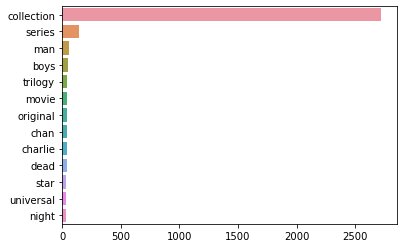

In [57]:
plot_top_non_stopwords_barchart(df['belongs_to_collection'].dropna())

In [39]:
a = df['overview']
#a = a.str.lower()
a = a.apply(lambda w: re.sub('[%s]' % re.escape(string.punctuation), '', w) )

a = a.str.split()
a = [palabra for palabra in a if len(palabra)>2]
a

[['Led',
  'by',
  'Woody',
  'Andys',
  'toys',
  'live',
  'happily',
  'in',
  'his',
  'room',
  'until',
  'Andys',
  'birthday',
  'brings',
  'Buzz',
  'Lightyear',
  'onto',
  'the',
  'scene',
  'Afraid',
  'of',
  'losing',
  'his',
  'place',
  'in',
  'Andys',
  'heart',
  'Woody',
  'plots',
  'against',
  'Buzz',
  'But',
  'when',
  'circumstances',
  'separate',
  'Buzz',
  'and',
  'Woody',
  'from',
  'their',
  'owner',
  'the',
  'duo',
  'eventually',
  'learns',
  'to',
  'put',
  'aside',
  'their',
  'differences'],
 ['When',
  'siblings',
  'Judy',
  'and',
  'Peter',
  'discover',
  'an',
  'enchanted',
  'board',
  'game',
  'that',
  'opens',
  'the',
  'door',
  'to',
  'a',
  'magical',
  'world',
  'they',
  'unwittingly',
  'invite',
  'Alan',
  'an',
  'adult',
  'whos',
  'been',
  'trapped',
  'inside',
  'the',
  'game',
  'for',
  '26',
  'years',
  'into',
  'their',
  'living',
  'room',
  'Alans',
  'only',
  'hope',
  'for',
  'freedom',
  'is',